Modelado con el dataset completo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
nRounds = 5
r_state = 42

In [4]:
df = pd.read_csv('../../data/preprocesada/Full_Data_sin_MultiC_sin_Skew.csv')

In [5]:
df.describe()

,Unnamed: 0,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor,site_eui
count,55844.000000,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.000000,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.0,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04
mean,27921.500000,1.791498e-16,1.302908e-16,-1.986934e-15,5.293062e-16,-8.143173e-17,-1.628635e-16,-1.954362e-16,-2.117225e-16,6.514538e-17,-6.840265e-16,1.628635e-17,-2.605815e-16,5.211631e-16,-6.392391e-16,3.420133e-16,1.097700e-14,-8.774269e-16,9.446081e-16,-3.582996e-16,-1.889216e-15,-7.165992e-16,-4.885904e-16,2.951900e-15,-3.908723e-16,-5.146485e-15,5.211631e-16,-5.537358e-16,-1.726353e-15,-1.140044e-16,2.605815e-16,1.954362e-15,3.257269e-17,-1.017897e-15,-3.615569e-15,-1.009753e-15,4.885904e-17,4.096016e-15,1.465771e-15,2.524384e-16,1.811856e-15,-2.280088e-16,4.234450e-16,9.120354e-16,-1.107472e-15,0.000000,3.257269e-17,-2.687247e-15,3.257269e-17,2.605815e-16,-1.465771e-16,9.771808e-17,2.280088e-16,1.302908e-16,1.017897e-17,0.0,-4.071586e-17,-1.913646e-16,5.781653e-16,4.641609e-16,-1.465771e-16,-1.628635e-17,-1.302908e-16,2.117225e-16
std,16120.918553,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.0,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,0.000000,-2.349004e+00,-1.038146e+00,-3.488578e+00,-2.649028e+00,-1.015803e+00,-1.886128e+00,-1.806745e+00,-3.544582e+00,-1.153458e+00,-1.824425e+00,-2.462684e+00,-2.142736e+00,-1.542049e+00,-1.632820e+00,-2.909286e+00,-3.076629e+00,-1.646766e+00,-3.424915e+00,-1.800202e+00,-2.866373e+00,-2.813900e+00,-3.498214e+00,-1.150229e+00,-2.590796e+00,-3.593248e+00,-2.975395e+00,-2.589246e+00,-2.850652e+00,-2.587186e+00,-2.976656e+00,-2.575

In [6]:
X = df.drop(columns=['Unnamed: 0','site_eui'])
y = df['site_eui']

In [7]:
X.shape

(55844, 62)

In [8]:
y.shape

(55844,)

In [9]:
X.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

In [10]:
pcaFinal = PCA(n_components=10)
X_selected = pcaFinal.fit_transform(X)
X_selected

array([[10.66773354, -2.32346943,  4.22009427, ..., -5.3695928 ,
        -0.69418569,  3.0732426 ],
       [ 5.80807621, -2.80831134,  3.29072839, ..., -2.72388761,
         2.77530357, -0.24292013],
       [ 5.77837291, -2.81213039,  3.2831442 , ..., -2.87772149,
         2.7981952 , -0.15730598],
       ...,
       [11.18903332,  1.03567855,  4.50412493, ...,  0.65787347,
        -1.58156752, -2.17840094],
       [11.23358551,  0.95010032,  4.50126255, ..., -0.26057212,
        -2.38705025, -0.91683159],
       [11.21540313,  0.97138022,  4.45666256, ...,  0.91608695,
        -2.22146723, -1.9993341 ]])

In [11]:
#fs = SelectKBest(score_func=f_regression, k='all')
#X_selected = fs.fit_transform(X, y)
#X_selected

In [12]:
X_selected.shape

(55844, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, 
                                                    y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state = r_state)

In [14]:
X_train.shape

(44675, 10)

In [15]:
X_test.shape

(11169, 10)

In [16]:
y_train.shape

(44675,)

In [17]:
y_test.shape

(11169,)

In [18]:
type(X_train)

numpy.ndarray

In [19]:
type(X_selected)

numpy.ndarray

In [20]:
def check_bias_variance (m, X_train, y_train, X_test, y_test,  r):
    avg_expected_loss, avg_bias,avg_var  = bias_variance_decomp(m, 
                                                                X_train, 
                                                                y_train.to_numpy(), 
                                                                X_test, 
                                                                y_test.to_numpy(), 
                                                                loss='mse', 
                                                                num_rounds=r, 
                                                                random_seed=1)
    print('Bias Variance analisys')
    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var ) 

In [21]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
    y_pred = model.predict(x_test)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False) # squared=False retorna RMSE / squared=True retorna MSE
    return {'rmse': rmse}

In [22]:
def generate_model(modelName, X_train, X_test, y_train, y_test ):    
    if modelName == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])   
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)
    if modelName == 'DecisionTreeRegressor':
        model = DecisionTreeRegressor(random_state = r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])   
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)        
    if modelName == 'SVN':
        model = SVR()
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)        
    if modelName == 'Lasso':
        model = linear_model.Lasso()
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)        
    if modelName == 'RandomForestRegressor':
        model = RandomForestRegressor(random_state = r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])
        print('-----------------------------')        
    if modelName == 'LinearSVR':
        model = LinearSVR(random_state = r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])
    if modelName == 'SGDRegressor':
        model = SGDRegressor(random_state=r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])  
    if modelName == 'AdaBoostRegressor':
        model = AdaBoostRegressor(random_state=r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])   
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)
    if modelName == 'GradientBoostingRegressor':  
        model = GradientBoostingRegressor(random_state=r_state)
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])  
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)    
    if modelName == 'XGBRegressor':
        model = XGBRegressor()
        model.fit(X_train, y_train)
        rf_eval = evaluate_model(model, X_test, y_test)
        print('RMSE:', rf_eval['rmse'])  
        print('-----------------------------')
        #check_bias_variance (model, X_train, y_train, X_test, y_test, nRounds)            

In [23]:
#RMSE: 0.867561992499243
#-----------------------------
#Bias Variance analisys
#Average expected loss: 0.758
#Average bias: 0.732
#Average variance: 0.026

generate_model('AdaBoostRegressor', X_train, X_test, y_train, y_test)

RMSE: 0.9817913213200017
-----------------------------


In [24]:
#generate_model('GradientBoostingRegressor', X_train, X_test, y_train, y_test)

RMSE: 0.8688825787475202
-----------------------------


In [25]:
generate_model('XGBRegressor', X_train, X_test, y_train, y_test)

RMSE: 0.8161092027535543
-----------------------------


In [26]:
#0.06420771551222759
#generate_model('RandomForestRegressor', X_train, X_test, y_train, y_test)

RMSE: 0.8362662975974466
-----------------------------


In [27]:
#1.0184404561903206
#generate_model('SVN', X_train, X_test, y_train, y_test)

RMSE: 0.8373281799433429
-----------------------------


In [29]:
#1.5532288510210452
#generate_model('LinearSVR', X_train, X_test, y_train, y_test)

RMSE: 0.954264904851031


C:\Users\laptop\Anaconda3\envs\TMLC_Python_10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
#9.492037586612488e+16
#generate_model('SGDRegressor', X_train, X_test, y_train, y_test)

RMSE: 0.9660752713943183


In [32]:
#0.7790143048388207
#generate_model('LinearRegression', X_train, X_test, y_train, y_test)

RMSE: 0.94370333351315
-----------------------------


In [33]:
#0.08443915887063108
#generate_model('DecisionTreeRegressor', X_train, X_test, y_train, y_test)

RMSE: 1.1229671707468145
-----------------------------


In [34]:
#1.007929730508921
#generate_model('Lasso', X_train, X_test, y_train, y_test)

RMSE: 0.9803603183043919
-----------------------------


# Tuning de hyperparametros

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

In [36]:
#Best: -0.599796 using {'max_features': 'sqrt', 'n_estimators': 1000}

parameters = {'learning_rate': (0.05, 0.1, 0.20), 'n_estimators': (10,100)}

#model = RandomForestRegressor(random_state = r_state)
model = XGBRegressor()

cv = KFold(n_splits=10, shuffle = True, random_state=r_state)
search = GridSearchCV(model, parameters,  scoring='neg_root_mean_squared_error', n_jobs=-1)
result = search.fit(X_train, y_train)

print("Best: %f using %s" % (result.best_score_, result.best_params_))
print('----------------------------------------------------------------')

means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.838919 using {'learning_rate': 0.2, 'n_estimators': 100}
----------------------------------------------------------------
-0.993570 (0.005270) with: {'learning_rate': 0.05, 'n_estimators': 10}
-0.857478 (0.005864) with: {'learning_rate': 0.05, 'n_estimators': 100}
-0.931951 (0.002774) with: {'learning_rate': 0.1, 'n_estimators': 10}
-0.844146 (0.005481) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.887575 (0.006180) with: {'learning_rate': 0.2, 'n_estimators': 10}
-0.838919 (0.005325) with: {'learning_rate': 0.2, 'n_estimators': 100}


Ahora se crea un nuevo modelos con los hyperparametros encontrados

In [37]:
modelT = XGBRegressor(learning_rate = 0.2, n_estimators = 100)
modelT.fit(X_train, y_train)
rf_eval = evaluate_model(modelT, X_test, y_test)
print('RMSE:', rf_eval['rmse']) 
#check_bias_variance (modelT, X_train, y_train, X_test, y_test, 5)

RMSE: 0.8202104718704387


# Feature importance 

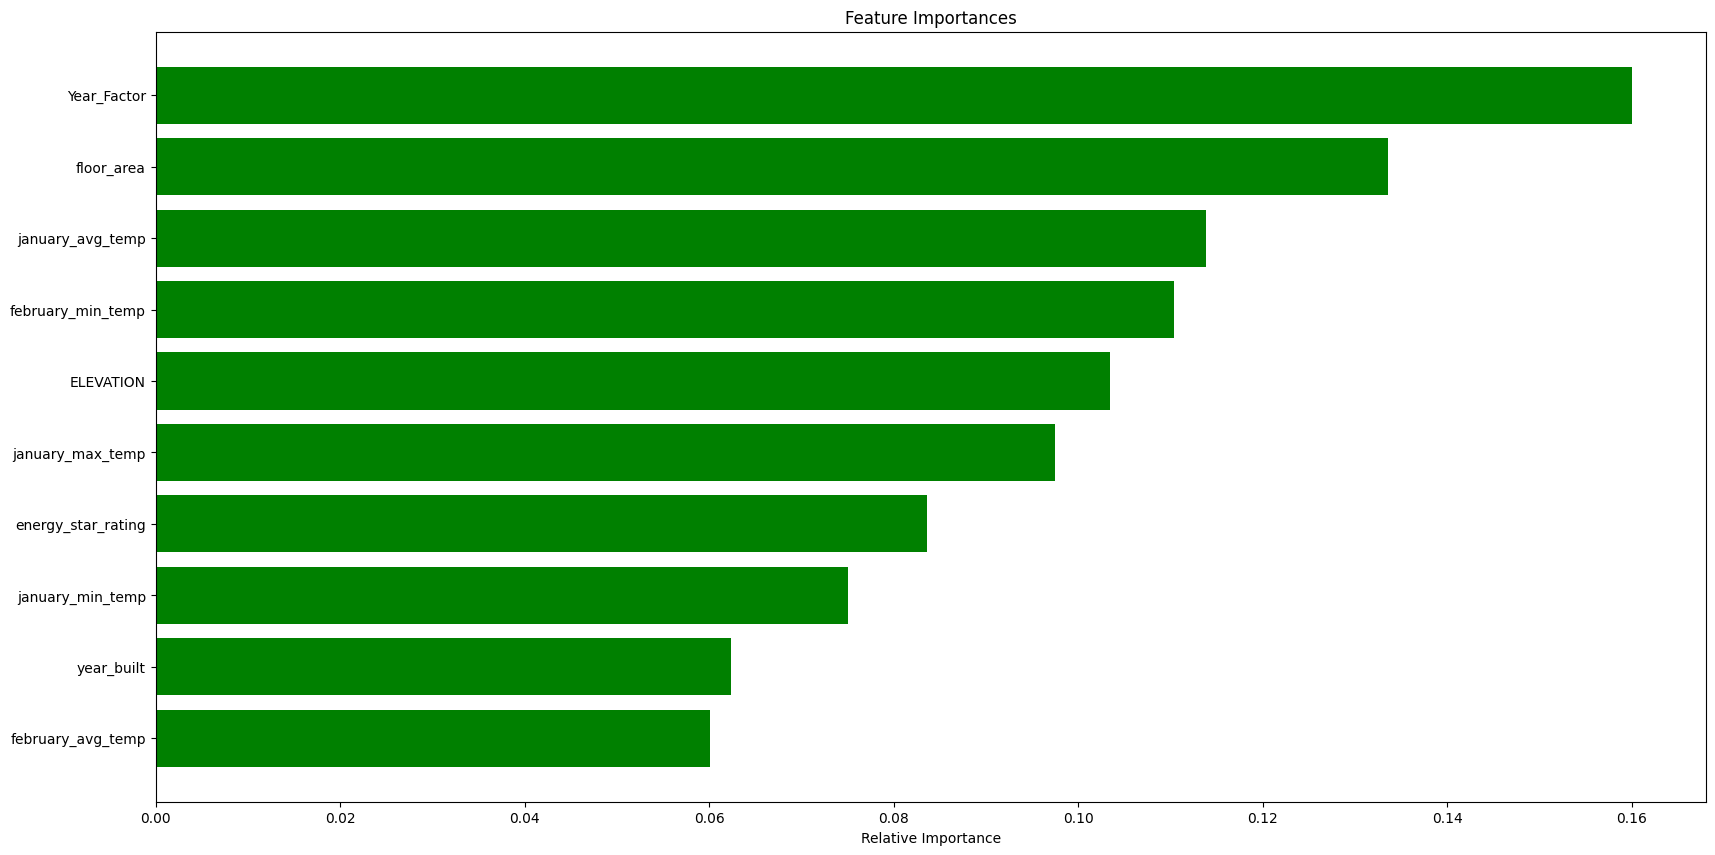

In [38]:
imp = modelT.feature_importances_
indices = np.argsort(imp)
feat = X.columns
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Notas

High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

Then, the bias of the model can be reduced by increasing the complexity by (1) implementing a boosting ensemble method, or (2) adding more features or doing feature engineering.



High variance suggests large changes to the estimate of the target function with changes to the training dataset (overfitting).

The variance instead can be reduced by (1) implementing a bagging ensemble method, or (2) constraining or shrinking estimated coefficients by regularization.

In [39]:
# Save the Model 
import joblib

In [40]:
joblib.dump(modelT, '../../models/SiteEnergyIntensityPrediction.joblib', compress=3)

['../../models/SiteEnergyIntensityPrediction.joblib']